In [13]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [14]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [15]:
# model
model = Network(5, 0.01)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=d_sigmoid, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=d_sigmoid, rfn=None))

In [16]:
# optimizer
opt = 'sgd'

In [17]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = opt, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [18]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 8000
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [19]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [20]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

eration 7599/8000: 	0.7673116666134273
itr 7600
Iteration 7600/8000: 	0.7673111674941588
itr 7601
Iteration 7601/8000: 	0.7673106683748905
itr 7602
Iteration 7602/8000: 	0.7673102405583747
itr 7603
Iteration 7603/8000: 	0.7673097414391064
itr 7604
Iteration 7604/8000: 	0.7673092423198379
itr 7605
Iteration 7605/8000: 	0.7673087432005695
itr 7606
Iteration 7606/8000: 	0.7673082440813012
itr 7607
Iteration 7607/8000: 	0.7673077449620327
itr 7608
Iteration 7608/8000: 	0.7673073171455169
itr 7609
Iteration 7609/8000: 	0.7673068180262486
itr 7610
Iteration 7610/8000: 	0.7673063902097328
itr 7611
Iteration 7611/8000: 	0.7673058910904643
itr 7612
Iteration 7612/8000: 	0.7673053206684434
itr 7613
Iteration 7613/8000: 	0.7673048215491749
itr 7614
Iteration 7614/8000: 	0.7673043937326591
itr 7615
Iteration 7615/8000: 	0.7673039659161434
itr 7616
Iteration 7616/8000: 	0.767303466796875
itr 7617
Iteration 7617/8000: 	0.7673029676776066
itr 7618
Iteration 7618/8000: 	0.7673024685583382
itr 7619
Ite

In [21]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [22]:
print(history)

4375, 0.767668893404096, 0.7676682516793224, 0.7676674673490436, 0.7676668969270225, 0.7676661125967436, 0.7676654708719699, 0.767664686541691, 0.76766411611967, 0.7676634030921436, 0.7676626900646174, 0.7676620483398438, 0.7676613353123175, 0.7676607648902964, 0.7676600518627702, 0.7676594101379965, 0.7676586971104702, 0.767657984082944, 0.7676574136609229, 0.7676567719361492, 0.767656058908623, 0.7676553458810966, 0.767654704156323, 0.7676539911287967, 0.7676533494040231, 0.7676527076792494, 0.7676519233489705, 0.7676513529269495, 0.7676506398994232, 0.7676500694774021, 0.7676492851471233, 0.7676487147251022, 0.767648001697576, 0.7676473599728023, 0.767646646945276, 0.7676460052205023, 0.7676453634957286, 0.7676445791654498, 0.7676440087434288, 0.7676433670186551, 0.7676425826883762, 0.7676419409636025, 0.7676412992388288, 0.7676406575140552, 0.7676400157892815, 0.7676393027617553, 0.7676386610369816, 0.7676379480094553, 0.767637234981929, 0.7676365932571554, 0.7676359515323817, 0.76

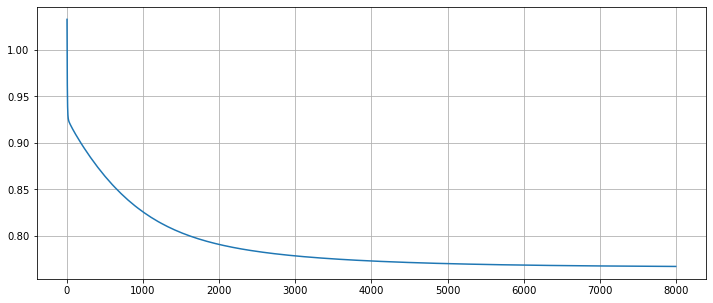

In [23]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [24]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 0. 1.] <-> [[0.4332358 ]
 [0.23026255]
 [0.33650166]]
[1. 0. 0.] <-> [[0.77862555]
 [0.16405055]
 [0.05732386]]
[1. 0. 0.] <-> [[0.7550388 ]
 [0.17891054]
 [0.06605069]]
[1. 0. 0.] <-> [[0.7331995 ]
 [0.18157831]
 [0.08522224]]
[0. 1. 0.] <-> [[0.6078833 ]
 [0.18215291]
 [0.20996377]]
[1. 0. 0.] <-> [[0.7786338 ]
 [0.16221319]
 [0.05915299]]
[1. 0. 0.] <-> [[0.626884  ]
 [0.19095747]
 [0.18215857]]
[1. 0. 0.] <-> [[0.7112661 ]
 [0.19032106]
 [0.09841282]]
[0. 0. 1.] <-> [[0.5034673 ]
 [0.21383962]
 [0.28269306]]
[1. 0. 0.] <-> [[0.6446289 ]
 [0.1999874 ]
 [0.15538375]]
[1. 0. 0.] <-> [[0.7568572]
 [0.1709932]
 [0.0721496]]
[1. 0. 0.] <-> [[0.77206856]
 [0.16998875]
 [0.05794276]]
[1. 0. 0.] <-> [[0.77855057]
 [0.16220938]
 [0.05924007]]
[0. 1. 0.] <-> [[0.5595987 ]
 [0.19354907]
 [0.2468522 ]]
[1. 0. 0.] <-> [[0.54747564]
 [0.1989319 ]
 [0.25359252]]
[1. 0. 0.] <-> [[0.7640542 ]
 [0.167702  ]
 [0.06824383]]
[1. 0. 0.] <-> [[0.5749524 ]
 [0.18684176]
 [0.23820578]]
[1. 0. 0.] <-> [[

In [25]:
print(model)

Neuron 0: weights:
[[ 1.9540358]
 [ 0.777458 ]
 [ 1.0388418]
 [-2.2956977]
 [ 2.2295895]]
 bias: [-3.13145973]

Neuron 1: weights:
[[ 0.42854318]
 [-0.47769952]
 [ 1.0906231 ]
 [ 2.0115898 ]
 [-1.0936528 ]]
 bias: [3.18664391]

Neuron 2: weights:
[[ 1.2999763]
 [ 2.2097979]
 [ 2.8042912]
 [-1.4761083]
 [-0.7373849]]
 bias: [-0.19457665]

Neuron 3: weights:
[[-2.2586215]
 [-1.9880239]
 [ 2.3582184]
 [-1.6744382]
 [-1.8579494]]
 bias: [3.86920441]

Neuron 4: weights:
[[-2.905582  ]
 [ 1.6491171 ]
 [-0.98772603]
 [-2.5703475 ]
 [ 2.2561724 ]]
 bias: [-1.55031035]

Neuron 5: weights:
[[-1.1920986 ]
 [-2.3882146 ]
 [ 1.4442446 ]
 [-3.1502857 ]
 [-0.99630016]]
 bias: [-3.0542946]

Neuron 6: weights:
[[-2.1124847 ]
 [-1.1689645 ]
 [ 1.8743148 ]
 [-2.92332   ]
 [ 0.20741425]]
 bias: [-0.86933583]

Neuron 7: weights:
[[-1.567934 ]
 [ 2.298221 ]
 [-2.474201 ]
 [-2.0842469]
 [-1.2779721]]
 bias: [3.75298238]

$
Neuron 0: weights:
[[-2.627514  ]
 [ 0.8170305 ]
 [-0.26555443]
 [-2.7148938 ]
 [ 1.08